# Проект 2. Разведывательный анализ данныx

26.03.2021 16:30

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.csv')

In [5]:
display(cacao.head(10))
cacao.info()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [6]:
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [7]:
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref',
                     'review_date', 'cocoa_percent', 'company_location', 'rating', 
                     'bean_type', 'broad_origin']

display(cacao.head(10))
cacao.info()

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bar_id            1795 non-null   int64  
 1   company           1795 non-null   object 
 2   specific_origin   1795 non-null   object 
 3   ref               1795 non-null   int64  
 4   review_date       1795 non-null   int64  
 5   cocoa_percent     1795 non-null   object 
 6   company_location  1795 non-null   object 
 7   rating            1795 non-null   float64
 8   bean_type         1794 non-null   object 
 9   broad_origin      1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


1795


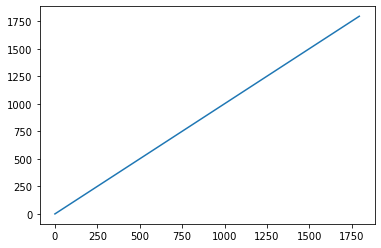

In [8]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

In [9]:
# cacao.drop(['bar_id'], inplace = True, axis = 1)

del cacao['bar_id']

In [10]:
display(cacao.head(10))
cacao.info()

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1795 non-null   object 
 1   specific_origin   1795 non-null   object 
 2   ref               1795 non-null   int64  
 3   review_date       1795 non-null   int64  
 4   cocoa_percent     1795 non-null   object 
 5   company_location  1795 non-null   object 
 6   rating            1795 non-null   float64
 7   bean_type         1794 non-null   object 
 8   broad_origin      1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [11]:
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Bonnat,26
Fresco,26
Pralus,25
...,...
Choocsol,1
Cacao Arabuco,1
Kiskadee,1
Raoul Boulanger,1


In [12]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

In [13]:
display(pd.DataFrame(cacao.company.value_counts()))

print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())

,company
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
...,...
Pangea,1
Grand Place,1
Metropolitan,1
Ki' Xocolatl,1


Значений, встретившихся в столбце более 10 раз: 30


In [14]:
cacao.loc[:, ['company']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


Итого у нас 407 уникальных значений и 99 строк, в которых производитель неизвестен. А вот компаний, у которых в рейтинге больше 10 батончиков, всего 30. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много.

__specific_origin__

Давайте сделаем то же самое для столбца с местом происхождения какао-бобов. 

In [15]:
pd.DataFrame(cacao.specific_origin.value_counts())

,specific_origin
,58
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
...,...
Arhuacos,1
"Alto Beni, Covendo Region",1
"Caranero, Choc. Garage Exclusive",1
Malgascio,1


In [16]:
cacao.company = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)

In [17]:
display(pd.DataFrame(cacao.specific_origin.value_counts()))

print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.specific_origin.value_counts()>10).sum())

# cacao.loc[:, ['company']].info()

# cacao.loc[:, ['specific_origin']].info()

,specific_origin
,58
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
...,...
Arhuacos,1
"Alto Beni, Covendo Region",1
"Caranero, Choc. Garage Exclusive",1
Malgascio,1


Значений, встретившихся в столбце более 10 раз: 16


__ref__

Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

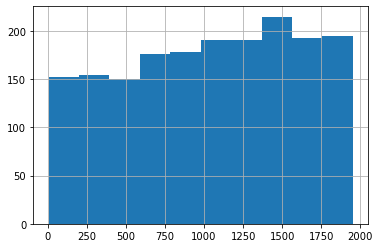

In [18]:
cacao.ref.hist()
cacao.ref.describe()

Как видно, у этого признака распределение без аномалий, выбросов нет. Заметен тренд на возрастание количества отзывов со временем (так как REF обозначает время внесения отзыва в базу). Интересно, почему так происходит?

__review_date__

Этот столбец также числовой и у него также нет пропусков. Как ведет себя распределение этого признака?

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

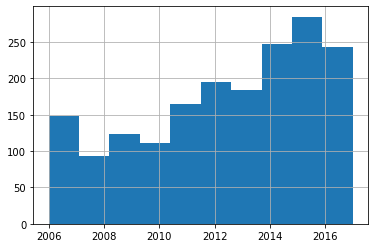

In [19]:
cacao.review_date.hist()
cacao.review_date.describe()

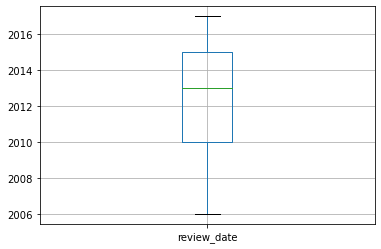

In [20]:
boxplot = cacao.boxplot(column='review_date')

__review_date__ выбросов не содержит.

__cocoa_percent__

Посмотрим на данные в столбце:

In [21]:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

Значения в столбцах представлены в виде процентов. Для дальнейшего анализа будет проще, если они будут представлены числами. Трансформируем столбец:

In [22]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

In [23]:
cacao.cocoa_percent.describe()

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

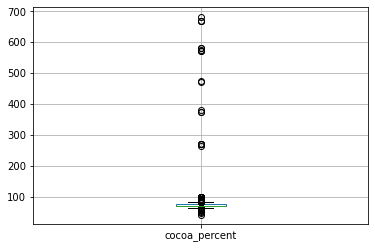

In [24]:
boxplot = cacao.boxplot(column='cocoa_percent')

In [25]:
cacao[cacao.cocoa_percent > 100].count()

company             19
specific_origin     19
ref                 19
review_date         19
cocoa_percent       19
company_location    19
rating              19
bean_type           19
broad_origin        19
dtype: int64

In [26]:
cacao[cacao.cocoa_percent > 100]

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
2,Atsane,Atsane,1676,2015,670.0,France,3.00,,Togo
203,Sambirano,Sambirano,423,2009,475.0,U.S.A.,3.25,Trinitario,Madagascar
220,Madagascar,Madagascar,911,2012,270.0,U.S.A.,3.75,Trinitario,Madagascar
400,Nicaragua,Nicaragua,1768,2016,580.0,U.S.A.,2.75,,Nicaragua
522,"Sambirano Valley, batch 2477","Sambirano Valley, batch 2477",1832,2016,470.0,South Africa,3.00,,Madagascar
540,Camino Verde,Camino Verde,1193,2013,576.0,U.S.A.,3.50,,Ecuador
581,"Rio Dulce, Xoco","Rio Dulce, Xoco",1662,2015,270.0,U.K.,4.00,Criollo,Guatemala
741,Grenada,Grenada,494,2010,582.0,Grenada,3.25,Trinitario,Grenada
827,"Marcial, single Cote, 2012","Marcial, single Cote, 2012",1030,2013,570.0,U.K.,4.00,Trinitario,St. Lucia
1139,Tumaco,Tumaco,955,2012,265.0,Colombia,2.50,,Colombia


<AxesSubplot:>

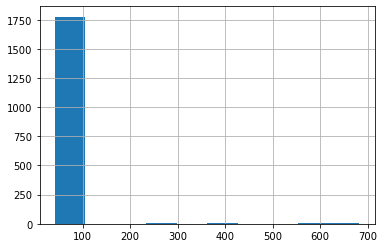

In [27]:
cacao.cocoa_percent.hist()

Видим, что основное распределение лежит между  и  процентами и есть потенциальные выбросы свыше % (об этом нам говорит здравый смысл).
Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок:

[percentile(25) -1.5*IQR : percentile(75)+1.5*IQR],

где IQR = percentile(75) - percentile(25).

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


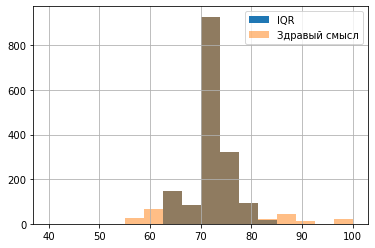

In [28]:
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (40, 100), label = 'IQR')
 
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(
alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
 
plt.legend();

Однако такой способ отбора выбросов работает не всегда. Когда мы знаем потенциальные характеристики распределения, лучше отобрать их, пользуясь здравым смыслом. Как видно, формула выбросов в нашем случае помечает как выбросы слишком много потенциально реальных значений, поэтому воспользуемся здравым смыслом. Очевидно, что при сборе данных произошла ошибка. К сожалению, такое случается нередко.

In [29]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]

In [30]:
cacao

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,Agua Grande,Agua Grande,1876,2016,63.0,France,11.50,,Sao Tome
1,Kpime,Kpime,1676,2015,70.0,France,2.75,,Togo
3,Akata,Akata,1680,2015,70.0,France,3.50,,Togo
4,Quilla,Quilla,1704,2015,70.0,France,3.50,,Peru
5,Carenero,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
...,...,...,...,...,...,...,...,...,...
1790,Peru,Peru,647,2011,70.0,Austria,3.75,,Peru
1791,Congo,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Kerala State,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Kerala State,Kerala State,781,2011,62.0,Austria,3.25,,India


## 2.4. Первичный анализ данных в столбцах. Часть II

__company_location__

Посмотрим на данные в столбце страны-производителя:

cacao.company_location

In [31]:
cacao.company_location

0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1776, dtype: object

In [32]:
cacao.company_location.value_counts()

U.S.A.            756
France            155
Canada            124
U.K.               94
Italy              63
                 ... 
India               1
Martinique          1
Wales               1
Niacragua           1
Czech Republic      1
Name: company_location, Length: 60, dtype: int64

In [33]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
India,1
Martinique,1
Wales,1
Niacragua,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


__rating__

Rating — важный столбец, так как именно рейтинг шоколада будет учиться предсказывать будущая модель.

Изучим данные:

In [34]:
cacao.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

In [35]:
cacao.rating.describe()

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

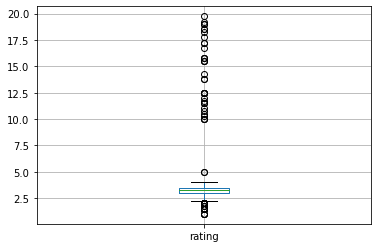

In [36]:
boxplot = cacao.boxplot(column='rating')

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


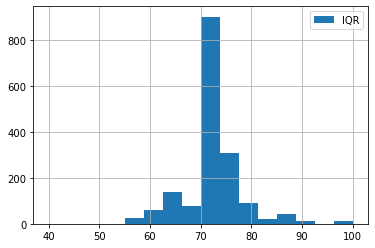

In [37]:
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao.cocoa_percent.loc[cacao.rating.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (40, 100), label = 'IQR')
 
# cacao.rating.loc[cacao.rating <= 100].hist(
# alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
 
plt.legend();

In [38]:
cacao[(cacao.rating <= 2.25) | (cacao.rating >= 4.45)]

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,Agua Grande,Agua Grande,1876,2016,63.0,France,11.50,,Sao Tome
7,Sur del Lago,Sur del Lago,1315,2014,70.0,France,11.50,Criollo,Venezuela
78,Chuao,Chuao,111,2007,70.0,Italy,5.00,Trinitario,Venezuela
81,Grenada,Grenada,123,2007,70.0,Italy,19.00,Trinitario,Grenada
86,Toscano Black,Toscano Black,40,2006,70.0,Italy,5.00,Blend,
...,...,...,...,...,...,...,...,...,...
1709,Madagascar w/ nibs,Madagascar w/ nibs,404,2009,68.0,Madagascar,13.75,Trinitario,Madagascar
1720,"Los Rios, Rancho Grande 2004/2007","Los Rios, Rancho Grande 2004/2007",153,2007,100.0,U.S.A.,2.00,Forastero (Arriba),Ecuador
1721,"Los Rios, Rancho Grande 2004/2007","Los Rios, Rancho Grande 2004/2007",153,2007,90.0,U.S.A.,2.00,Forastero (Arriba),Ecuador
1727,Peru,Peru,1458,2015,77.0,U.S.A.,15.50,"Criollo, Trinitario",Peru


<AxesSubplot:>

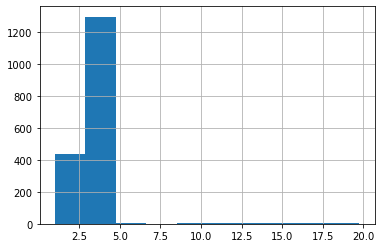

In [39]:
cacao.rating.hist()

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


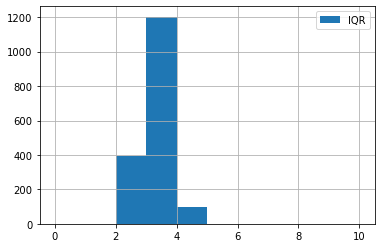

In [40]:
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


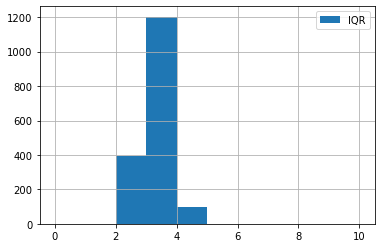

In [41]:
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend()

In [42]:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
cacao

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
1,Kpime,Kpime,1676,2015,70.0,France,2.75,,Togo
3,Akata,Akata,1680,2015,70.0,France,3.50,,Togo
4,Quilla,Quilla,1704,2015,70.0,France,3.50,,Peru
5,Carenero,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
6,Cuba,Cuba,1315,2014,70.0,France,3.50,,Cuba
...,...,...,...,...,...,...,...,...,...
1790,Peru,Peru,647,2011,70.0,Austria,3.75,,Peru
1791,Congo,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Kerala State,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Kerala State,Kerala State,781,2011,62.0,Austria,3.25,,India


__bean_type__

Сразу заменим пропуски на None:

In [43]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [44]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  861 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


 Мы видим, что есть строка со значением nan, надо заменить её на None для удобства. Также мы видим, что многие типы бобов указаны с пояснением, например "Criollo (Ocumare 67)", такие значения стоит привести к общему виду.

Также некоторые батончики сделаны из комбинации какао-бобов. Возможно, этот столбец для дальнейшего анализа нужно будет преобразовать через метод get_dummies(), однако сейчас мы делать этого не будем.

__Метод get_dummies() позволяет сделать из одного параметра несколько путём векторизации. С этим методом вы подробно познакомитесь в следующем юните.__

In [45]:
pd.isnull("nan")

False

In [46]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [47]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Beniano,3
Matina,3
EET,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


Мы сократили количество уникальных значений в столбце до 21. Пустые значения заполнить не получится, так как есть пять самых популярных (10+ батончиков) сортов какао.

__broad_origin__

In [48]:
cacao.broad_origin

1            Togo
3            Togo
4            Peru
5       Venezuela
6            Cuba
          ...    
1790         Peru
1791        Congo
1792        India
1793        India
1794       Brazil
Name: broad_origin, Length: 1690, dtype: object

In [49]:
cacao.broad_origin = cacao.broad_origin.astype(str).apply(lambda x: None if x.strip() == '' else x)
cacao.broad_origin

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


1            Togo
3            Togo
4            Peru
5       Venezuela
6            Cuba
          ...    
1790         Peru
1791        Congo
1792        India
1793        India
1794       Brazil
Name: broad_origin, Length: 1690, dtype: object

In [50]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['bean_type']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
...,...
"Ven., Trinidad, Mad.",1
"Peru, Mad., Dom. Rep.",1
nan,1
"Peru, Madagascar",1


Значений, встретившихся в столбце более 10 раз: 25
Уникальных значений: 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [51]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [52]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
...,...
"SouthAmerica,Africa",1
Suriname,1
"DomincanRepublic,Ecuador,Peru",1
"Venezuela,Ecuador,Peru,Nicaragua",1


Значений, упомянутых более 10 раз: 25
Уникальных значений: 93
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1630 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [54]:
print(pd.DataFrame(cacao.broad_origin.value_counts()))

                                  broad_origin
Venezuela                                  202
Ecuador                                    179
Peru                                       160
Madagascar                                 138
DominicanRepublic                          135
...                                        ...
SouthAmerica,Africa                          1
Suriname                                     1
DomincanRepublic,Ecuador,Peru                1
Venezuela,Ecuador,Peru,Nicaragua             1
Ghana,DomincanRepublic                       1

[93 rows x 1 columns]


Мы сократили количество уникальных значений (хотя и всего на 4). Однако такая трансформация в последствии поможет нам преобразовать данные через метод get_dummies(). Пропущенные значения заполнить не получится, так как данных всё ещё достаточно мало.

## 2.5. Корреляционный анализ

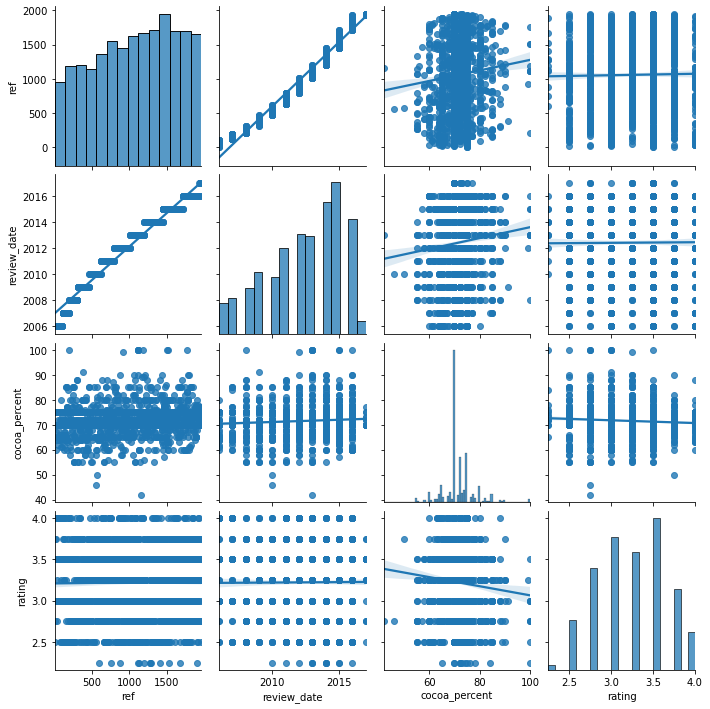

In [55]:
sns.pairplot(cacao, kind = 'reg')

In [56]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


## 2.6. Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.

In [57]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

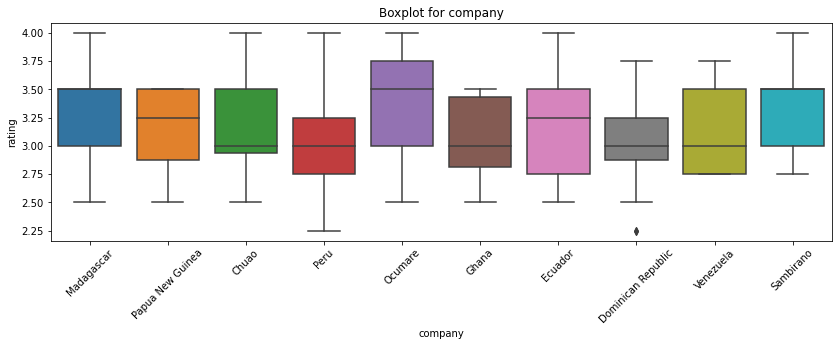

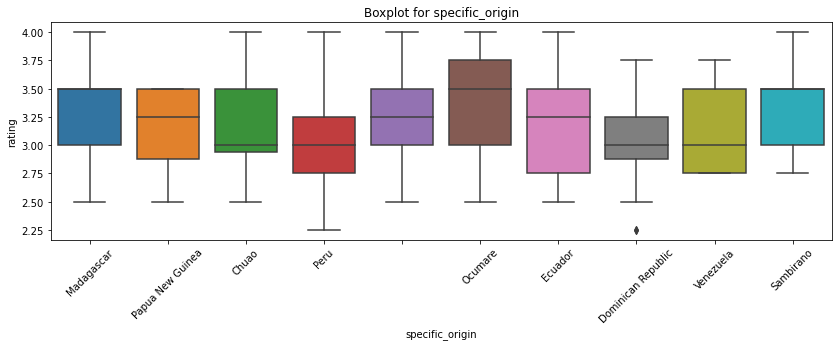

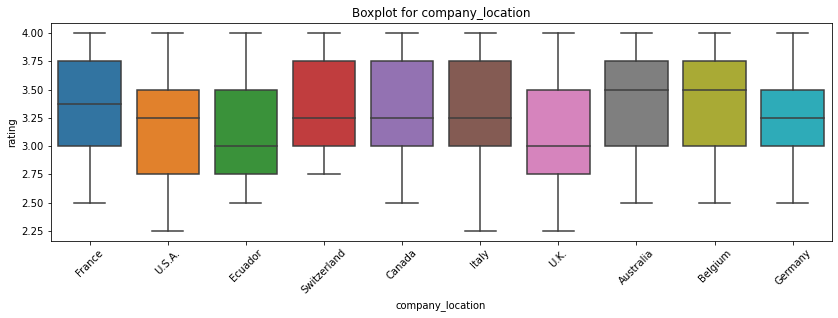

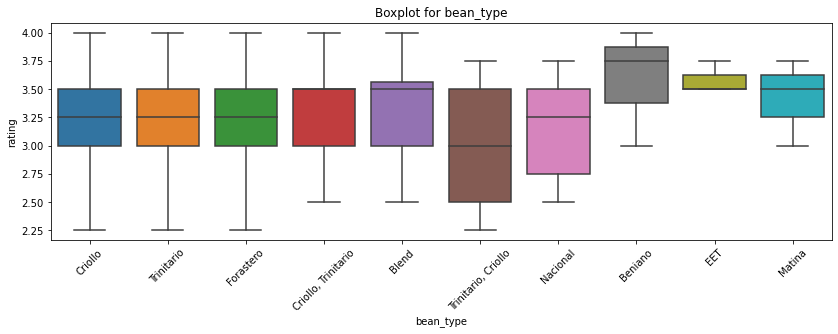

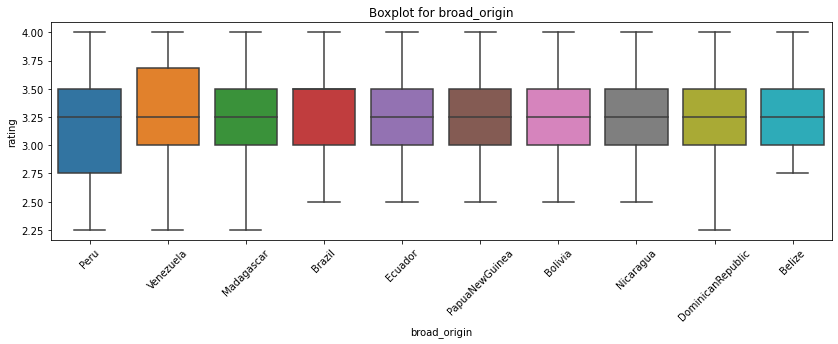

In [58]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме broad_origin, могут влиять на оценку батончика. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [62]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    print(cols)
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        print(comb)
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [60]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

('Madagascar', 'Peru')
Найдены статистически значимые различия для колонки company
('\xa0', 'Madagascar')
('\xa0', 'Peru')
('\xa0', 'Ecuador')
('\xa0', 'Dominican Republic')
('\xa0', 'Venezuela')
('\xa0', 'Sambirano')
('\xa0', 'Chuao')
('\xa0', 'Ocumare')
('\xa0', 'Papua New Guinea')
('Madagascar', 'Peru')
Найдены статистически значимые различия для колонки specific_origin
('U.S.A.', 'France')
Найдены статистически значимые различия для колонки company_location
('Trinitario', 'Forastero')
('Trinitario', 'Criollo')
('Trinitario', 'Criollo, Trinitario')
('Trinitario', 'Blend')
('Trinitario', 'Trinitario, Criollo')
('Trinitario', 'Nacional')
('Trinitario', 'Beniano')
('Trinitario', 'Matina')
('Trinitario', 'EET')
('Forastero', 'Criollo')
('Forastero', 'Criollo, Trinitario')
('Forastero', 'Blend')
('Forastero', 'Trinitario, Criollo')
('Forastero', 'Nacional')
('Forastero', 'Beniano')
('Forastero', 'Matina')
('Forastero', 'EET')
('Criollo', 'Criollo, Trinitario')
('Criollo', 'Blend')
('Crio

Как мы видим, серьёзно отличаются три параметра: company,  specific_origin и  company_location. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: company, specific_origin, company_location, review_date, cocoa_percent.

In [61]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model

,company,specific_origin,company_location,review_date,cocoa_percent
1,Kpime,Kpime,France,2015,70.0
3,Akata,Akata,France,2015,70.0
4,Quilla,Quilla,France,2015,70.0
5,Carenero,Carenero,France,2014,70.0
6,Cuba,Cuba,France,2014,70.0
...,...,...,...,...,...
1790,Peru,Peru,Austria,2011,70.0
1791,Congo,Congo,Austria,2011,65.0
1792,Kerala State,Kerala State,Austria,2011,65.0
1793,Kerala State,Kerala State,Austria,2011,62.0
